# ML Algorithm Insight Series
## Module: Feedforward Neural Networks

### 1. Introduction & Intuition

Feedforward Neural Networks (FNNs), or Multi-Layer Perceptrons (MLPs), are a class of models inspired by the structure of the human brain. Information flows through the network in one direction—from input to output—making them suitable for classification and regression problems with complex, non-linear relationships.

Imagine passing a signal through a series of increasingly refined filters—each layer transforms the input until it becomes something useful at the output.


### 2. How the Algorithm Works

An FNN consists of:
- **Input layer**: Receives the data.
- **Hidden layers**: Apply non-linear transformations using weights, biases, and activation functions.
- **Output layer**: Produces final predictions.

The forward pass:
\[
a^{(l)} = \sigma(W^{(l)} a^{(l-1)} + b^{(l)})
\]

The backward pass (training phase) uses gradient descent and backpropagation to update weights:

\[
\theta \leftarrow \theta - \eta \nabla J(\theta)
\]

Where:
- \( \theta \): model parameters
- \( \eta \): learning rate
- \( J(\theta) \): loss function (e.g., MSE, cross-entropy)


### 3. Data and Preparation Insights

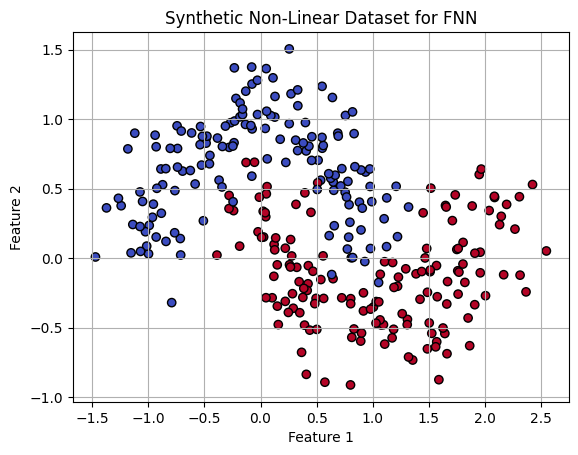

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("Synthetic Non-Linear Dataset for FNN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

Always normalize or standardize features before inputting them into a neural network. FNNs are sensitive to input scale.

### 4. Implementation Highlights

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)


MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

### 5. Insightful Visualization

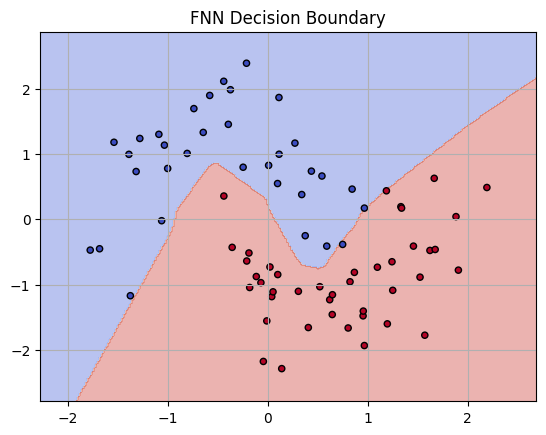

In [3]:
import numpy as np

def plot_decision_boundary(model, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k', cmap='coolwarm')
    plt.title("FNN Decision Boundary")
    plt.grid(True)
    plt.show()

plot_decision_boundary(mlp, X_test_scaled, y_test)

The boundary adapts to complex patterns in the data, revealing the power of stacked non-linearities.

### 6. Algorithm Evaluation

In [4]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = mlp.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.98      1.00      0.99        42

    accuracy                           0.99        75
   macro avg       0.99      0.98      0.99        75
weighted avg       0.99      0.99      0.99        75



### 7. Pros, Cons, and Techniques

**Strengths:**
- Captures complex, non-linear relationships
- Highly flexible architecture
- Widely applicable to structured data, time-series, and images

**Limitations:**
- Requires careful tuning (e.g., learning rate, architecture)
- Can overfit if not regularized
- Less interpretable than simpler models

**Enhancements**:
- Use early stopping or dropout to prevent overfitting
- Experiment with different activations (ReLU, tanh)
- Optimize architecture via grid/random search


### 8. Further Explorations

- TODO: Compare different activation functions
- TODO: Analyze effect of varying hidden layers and neurons
- TODO: Add regularization techniques like dropout


### 9. Summary & Resources

**Key Insights:**
- Feedforward networks learn flexible representations through layers of transformations.
- They benefit greatly from standardized input and proper tuning.
- While less interpretable, they unlock significant modeling power.

**Further Reading:**
- “Deep Learning” – Goodfellow, Bengio, Courville
- Scikit-learn Documentation: MLPClassifier
- Bishop – Neural Networks for Pattern Recognition

**Notebook Repo**: (add your GitHub link)  
**Companion Article**: (add Medium/Substack link)
